In [1]:
#!pip install fiftyone
#!pip install fiftyone-db-ubuntu1604

In [2]:
import fiftyone.brain as fob
import fiftyone as fo
import fiftyone.zoo as foz

In [1]:

data_path = "."
labels_path = "train.json"

# Import the dataset
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=data_path,
    labels_path=labels_path,
)

 100% |███████████████| 4883/4883 [22.2s elapsed, 0s remaining, 228.3 samples/s]      



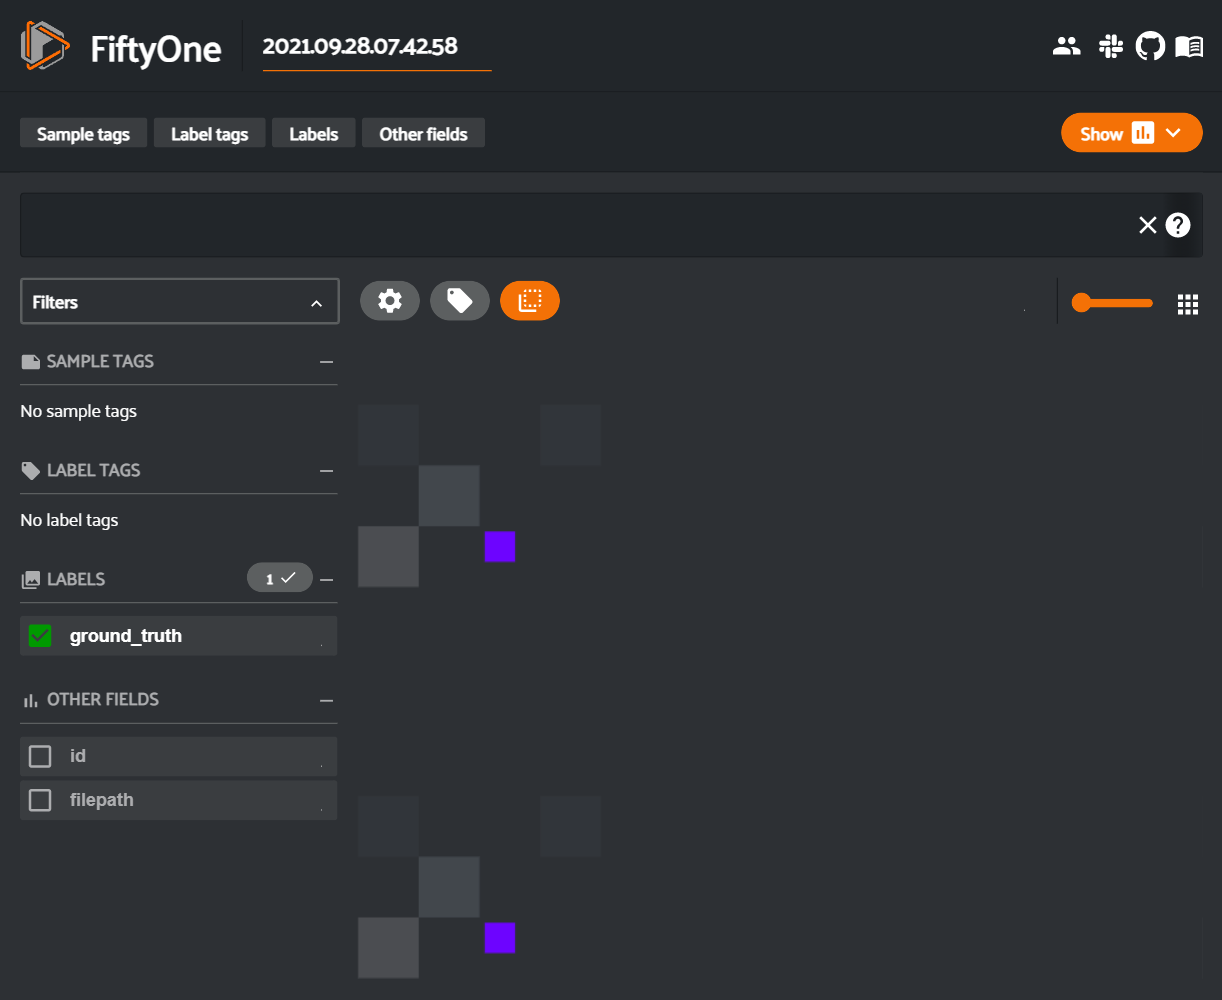

In [2]:
session = fo.launch_app(dataset)
session.freeze()

## Model predictions

In [ ]:
model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")
dataset.apply_model(model, label_field="predictions")

In [ ]:
import fiftyone.brain as fob

fob.compute_mistakenness(
  dataset, 
  pred_field="predictions", 
  label_field="ground_truth"
)

In [ ]:
session = fo.launch_app(dataset)

## Dimension Reduction visualization

In [ ]:
!pip install torch torchvision umap-learn
!pip install ipywidgets>=7.5

In [2]:
import cv2
import numpy as np

import fiftyone.brain as fob

# Construct a ``num_samples x num_pixels`` array of images
embeddings = np.array([
    cv2.resize( cv2.imread(data.filepath, cv2.IMREAD_UNCHANGED), (512, 512), interpolation = cv2.INTER_CUBIC).ravel() 
    for data in dataset
])

In [ ]:
embeddings.shape

In [3]:
# Compute 2D representation
results = fob.compute_visualization(
    dataset,
    embeddings=embeddings,
    num_dims=2,
    method="umap",
    verbose=True,
    seed=51)

Generating visualization...
UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=51, verbose=True)
Construct fuzzy simplicial set
Mon Sep 27 09:25:16 2021 Finding Nearest Neighbors
Mon Sep 27 09:25:19 2021 Building RP forest with 8 trees
Mon Sep 27 09:26:12 2021 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	Stopping threshold met -- exiting after 6 iterations
Mon Sep 27 09:45:26 2021 Finished Nearest Neighbor Search
Mon Sep 27 09:45:37 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Sep 27 09:46:02 2021 Finished embedding


In [4]:
print(type(results))
print(results.points.shape)

<class 'fiftyone.brain.visualization.VisualizationResults'>
(4883, 2)


In [18]:
labels = [data.ground_truth.detections[0].label for data in dataset]

In [19]:
plot = results.visualize(labels)
plot.show(height=720)

FigureWidget({
    'data': [{'customdata': array(['61518d6102767f73e11b4081', '61518d6202767f73e11b428e',
    …

Server Error

An exception has been raised by the server. Your session has been reverted to its previous state.

Traceback (most recent call last):
  File "main.py", line 295, in wrapper
    result = await func(self, *args, **kwargs)
  File "main.py", line 537, in on_message
    await event(self, **message)
  File "main.py", line 615, in on_update
    StateHandler.state = fos.StateDescription.from_dict(state).serialize()
  File "/opt/conda/envs/detection/lib/python3.7/site-packages/fiftyone/core/state.py", line 126, in from_dict
    view = fov.DatasetView._build(dataset, stages)
  File "/opt/conda/envs/detection/lib/python3.7/site-packages/fiftyone/core/view.py", line 758, in _build
    view = view.add_stage(stage)
  File "/opt/conda/envs/detection/lib/python3.7/site-packages/fiftyone/core/collections.py", line 2053, in add_stage
    return self._add_view_stage(stage)
  File "/opt/conda/envs/detection/lib/python3.7/site-packages/fiftyone/core/view.py", line 798, in _add_view_stage
    

## Data Uniqueness

In [5]:
fob.compute_uniqueness(dataset)

Generating embeddings...
   4% |\--------------|  192/4883 [1.6s elapsed, 39.7s remaining, 118.1 samples/s] 

/opt/conda/envs/detection/lib/python3.7/site-packages/fiftyone/utils/torch.py:579: RuntimeWarning: overflow encountered in exp
  odds = np.exp(logits)
/opt/conda/envs/detection/lib/python3.7/site-packages/fiftyone/utils/torch.py:580: RuntimeWarning: invalid value encountered in true_divide
  odds /= np.sum(odds, axis=1, keepdims=True)


 100% |███████████████| 4883/4883 [31.3s elapsed, 0s remaining, 160.2 samples/s]      
Computing uniqueness...
Uniqueness computation complete


In [23]:
print(dataset)

Name:        2021.09.27.09.22.40
Media type:  image
Num samples: 4883
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField


In [8]:
# Sort in increasing order of uniqueness (least unique first)
dups_view = dataset.sort_by("uniqueness")

# Open view in the App
session.view = dups_view